In [26]:
import numpy as np
import matplotlib.pyplot as plt
import lib.myhelpers as hlp
from lib.envmap import Map, Rect
import itertools as it
from scipy.signal import convolve2d
from skimage.draw import circle
from scipy.ndimage import rotate

In [2]:
grid_res  = 2 # 2x2 grid resolution
angle_res = np.radians(5) # 5 degree angle resolution

robot_dims = np.array([50,50]) # robot is 50 x 50 square
clearance = 50/2    # recontextualizing the robot as a point at the center of the bot,
                    # it requires <clearance> units of clearance between it and an obstacle

# Map dimensions
xlim = (0,800)
ylim = (0,300)

map_width  = np.diff(xlim)
map_height = np.diff(ylim)

# Define map
env = Map(origin=(0,0), xlim=xlim, ylim=ylim, resolution=grid_res, lefthanded=True) # arraylike indiates dimensions are left-handed

obstacles = [
    # Outer borders - start and endpoints
    [(0,0),(800,0)],
    [(0,0),(0,300)],
    [(800,0),(800,300)],
    [(0,300),(800,300)],
    # Inner borders
    [(200,0),(200,200)],
    [(100,200),(300,200)],
    [(400,300),(400,100)],
    [(600,0),(600,200)],
    [(500,200),(700,200)]
]

[env.draw_line(*o) for o in obstacles];

# # Inflate borders by clearance to 
# inflated_borders = [
#     # Top boundary -- inflated by clearance
#     Rect(width=map_width,  height=clearance, anchor=(0,0)) ,
#     Rect(width=-map_width,  height=-clearance, anchor=(map_width,map_height)) , # bottom
#     Rect(width=clearance, height=map_height, anchor=(0,0)) , # left
#     Rect(width=-clearance,  height=-map_height, anchor=(map_width,map_height))   # right
# ]
# [env.fill_rect(r) for r in inflated_borders];

In [3]:
env.grid

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       ...,
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 1, 1, ..., 1, 1, 1]])

(-0.5, 400.5, 150.5, -0.5)

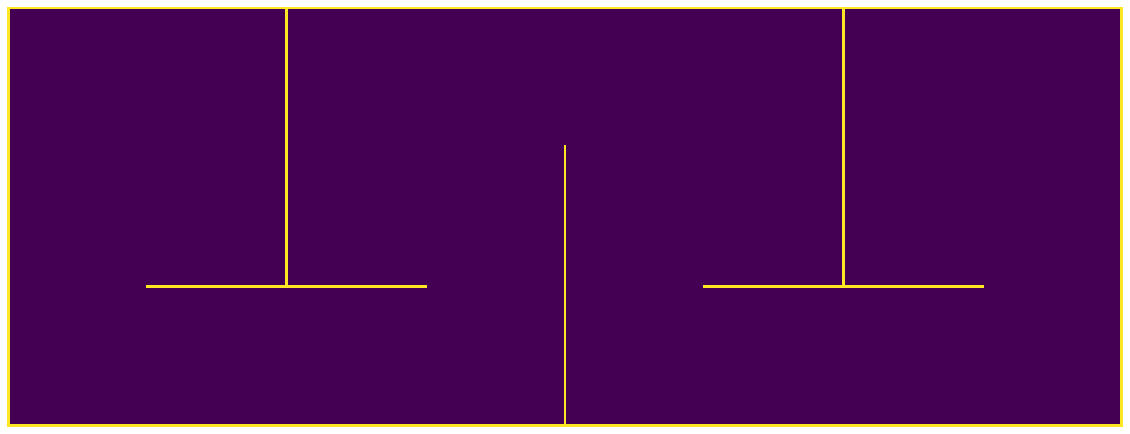

In [4]:
fig, ax = plt.subplots(figsize=(20,20))
ax.matshow(env.grid)

In [5]:
# def dist_pt_ln(pt,ln1,ln2):
#     '''Distance between point pt and line defined by points ln1 and ln2.'''
#     return np.abs(np.cross(ln2-ln1,pt-ln1)/np.linalg.norm(ln2-ln1))

# # Find all points within CLEARANCE of an obstacle; set grid space to 1
# all_inds = list(np.ndindex(env.grid.shape))

# for obs in obstacles:
#     obs = np.array(obs)
#     d = dist_pt_ln(env._to_coord(all_inds),obs[0],obs[1])
#     inds = np.array(all_inds)[d < 5]
#     env.draw_points(inds,units='grid')

# # @TODO: FIX BUG where all points colinear with obstacles are considered unpassable

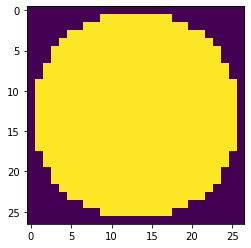

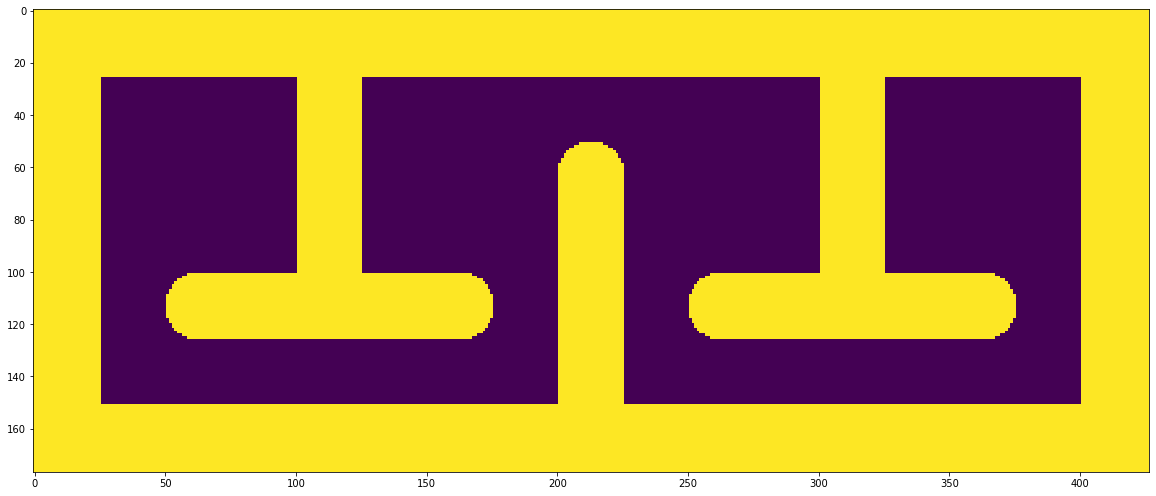

In [22]:
# Create a mask of radius <clearance>. Convolve with the map. Any pixel with a nonzero value
# had overlap within the mask with an obstacle, and therefore is within <clearance> of that
# obstacle, and is therefore blocked.

r = int(np.ceil(clearance/grid_res))
mask = np.zeros((2*r+1,2*r+1))
rr, cc = circle(
    r=r, 
    c=r, 
    radius=r, 
    shape=mask.shape)
mask[rr, cc] = 1
plt.imshow(mask)


output = convolve2d(env.grid,mask,fillvalue=1)
output[np.nonzero(output)] = 1

fig, ax = plt.subplots(figsize=(20,20))
plt.imshow(output)

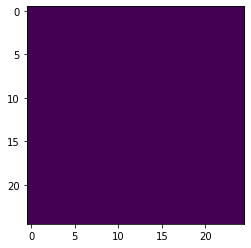

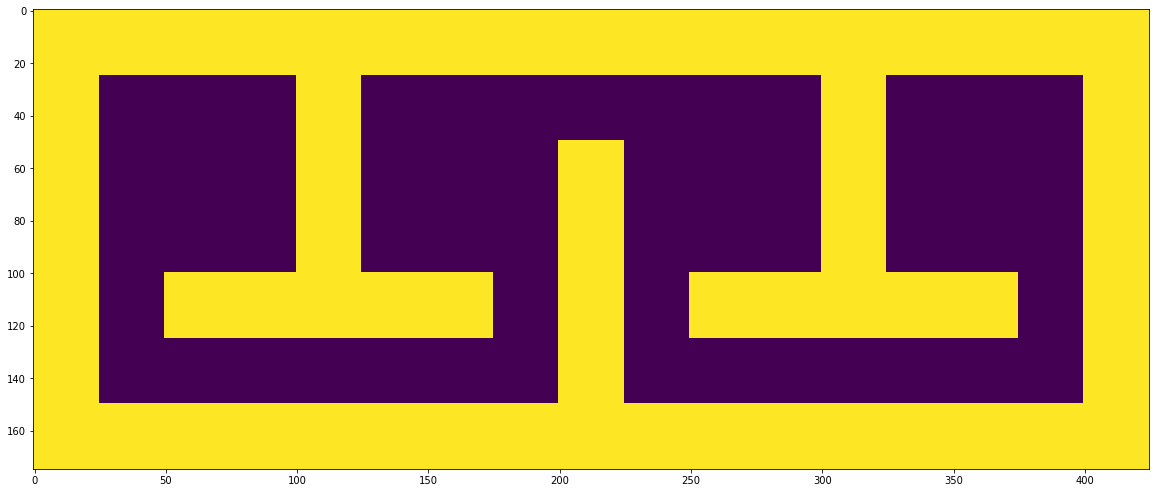

In [25]:
# Convolve the square robot itself with the environment to see where it can go without 
# colliding at a given orientation.

l = int(np.ceil(50/grid_res))
mask = np.ones((l,l))
plt.imshow(mask) # colormap makes it look purple because its all 1s but 
                 # trust me it's all filled in


output = convolve2d(env.grid,mask,fillvalue=1)
output[np.nonzero(output)] = 1

fig, ax = plt.subplots(figsize=(20,20))
plt.imshow(output)

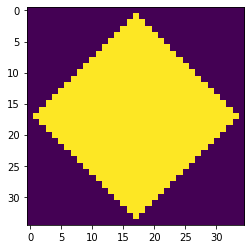

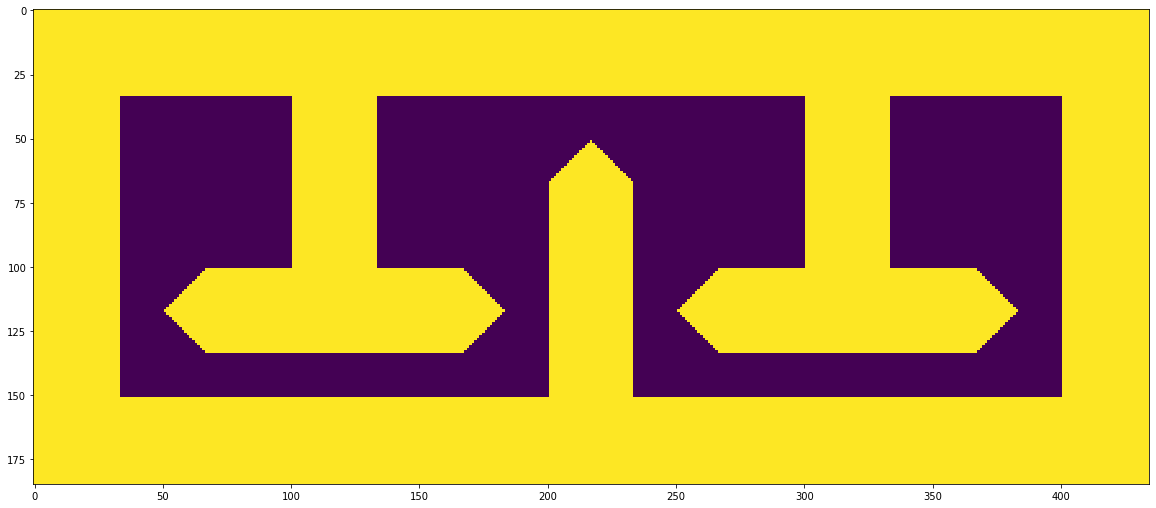

In [31]:
# Let's try at orientation 45 degrees
mask = rotate(mask,45,reshape=True)
plt.imshow(mask)

output = convolve2d(env.grid,mask,fillvalue=1)
output[np.nonzero(output)] = 1

fig, ax = plt.subplots(figsize=(20,20))
plt.imshow(output)